Explore some of the following research questions:

- Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
- What risk factors are most predictive of diabetes risk?
- Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
- Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

# Exploratory Data Analysis (EDA) on Diabetes Dataset

## Overview
This notebook aims to perform a comprehensive exploratory analysis of the 'diabetes_012_health_indicators_BRFSS2015' dataset. The dataset comprises various health indicators that might be related to diabetes.

Our primary goals are to:
1. Understand the distribution and nature of the data.
2. Identify patterns, anomalies, or relationships among the features.
3. Generate insights that can aid in predicting diabetes.

## Dataset Description
The dataset contains several health indicators, such as blood pressure, cholesterol levels, BMI, and others, along with a target variable indicating the presence of diabetes.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

(Note: Add any additional information about the dataset here, such as the source, number of rows/columns, etc.)


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for better visualization
sns.set(style="whitegrid")  # Setting the style of the plots
plt.rcParams['figure.figsize'] = [10, 6]  # Customizing plot size

# Load the dataset
file_path = '/workspaces/codespaces-jupyter/data/diabetes_predection/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Initial Data Exploration

Before diving deep into individual analyses, let's perform a preliminary exploration to understand the basic structure of our data:

- What are the features present in the dataset?
- What types of variables (categorical, numerical) are we dealing with?
- Are there any missing values in the dataset?

We will start by examining the first few rows of the data, checking the data types of each column, and looking for the presence of any missing values.


In [2]:
# Determine types of variables
binary_categorical_vars = [col for col in data.columns if data[col].dropna().value_counts().index.isin([0, 1]).all()]
continuous_vars = data.select_dtypes(include=['float64', 'int64']).columns.difference(binary_categorical_vars)
discrete_vars = [col for col in continuous_vars if data[col].dropna().unique().shape[0] < 10]  # Arbitrary cutoff for discrete variables
continuous_vars = [col for col in continuous_vars if col not in discrete_vars]

# Output the variables by type
print("Binary Categorical Variables:", binary_categorical_vars)
print("Continuous Variables:", continuous_vars)
print("Discrete Variables:", discrete_vars)


Binary Categorical Variables: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Continuous Variables: ['Age', 'BMI', 'MentHlth', 'PhysHlth']
Discrete Variables: ['Diabetes_012', 'Education', 'GenHlth', 'Income']


In [3]:
# Displaying the dataset's basic information
print("Dataset Info:")
print(data.info())

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Displaying basic statistics
print("\nBasic Statistical Overview:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null 

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

## Visualizing the Distribution of the Target Variable

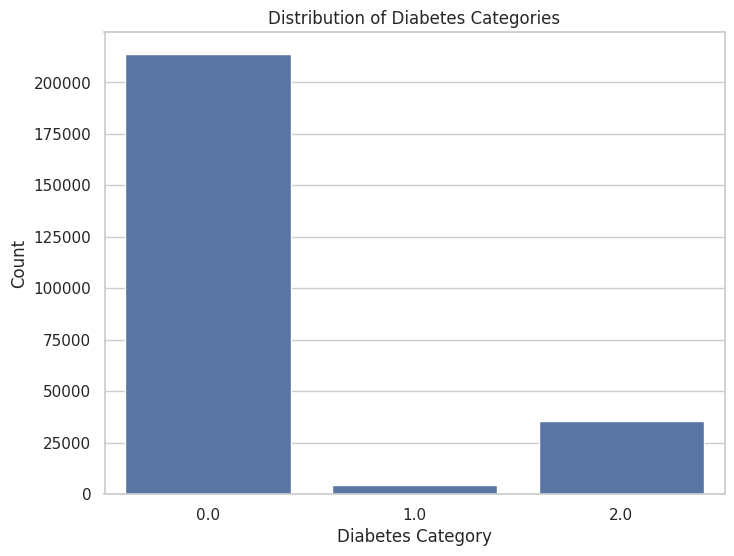

In [4]:
# Plotting the distribution of the target variable 'Diabetes_012'
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution of Diabetes Categories')
plt.xlabel('Diabetes Category')
plt.ylabel('Count')
plt.show()


## Observations on Target Variable Distribution

From the bar plot above, we observe that:

- A large number of individuals are categorized as '0.0', which likely represents non-diabetic individuals.
- A significantly smaller number of individuals are categorized as '1.0' and '2.0', which may represent diabetic individuals, possibly at different stages or types of diabetes.

### Implications of Class Imbalance

The observed class imbalance can have several implications for our predictive modeling:

1. **Model Performance**: Standard accuracy metrics may be misleading. A model that predicts '0.0' for all cases will still appear to have high accuracy.
2. **Model Training**: Many machine learning algorithms assume an equal number of examples for each class, which is not the case here.

### Addressing Class Imbalance

To address this imbalance, we can consider the following strategies:

1. **Resampling**: We could oversample the minority class, undersample the majority class, or use a combination of both to achieve a more balanced dataset.
2. **Weighted Training**: Assign a higher weight to the minority class during model training to penalize the model more for misclassifying the minority class.
3. **Choosing the Right Metrics**: Use metrics that are insensitive to class imbalance, like F1-score, precision-recall curves, and area under the ROC curve (AUC-ROC).

We will need to keep these considerations in mind as we proceed to model selection and training.


In [5]:
# Analyzing class imbalance in numbers
class_counts = data['Diabetes_012'].value_counts()
print(class_counts)

# Analyzing class imbalance in proportions
class_proportions = data['Diabetes_012'].value_counts(normalize=True)
print(class_proportions)


0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: Diabetes_012, dtype: float64


## Class Analysis and Proportions

After quantifying the class distribution, I find the following:

- `Class 0` (Non-diabetic): 213,703 instances (84% of the dataset)
- `Class 1` (Pre-Diabetic): 4,631 instances (1.82% of the dataset)
- `Class 2` (Diabetic): 35,346 instances (13.9% of the dataset)

These numbers confirm the visual observation from the bar plot, indicating a severe class imbalance.


## Categorical Variable Distributions

In this section, we visualize the distribution of each categorical variable. These distributions help us understand the balance of categories within each variable and can provide insights into the diversity of the dataset's respondents.

For each variable, we observe the count of respondents for each category and note any imbalances. This information could be vital for understanding the predictive power of each variable and for making decisions during the model training process.

(Note: The following plots have been generated using a custom function designed to iterate through each categorical variable and create a bar plot. This approach ensures that we efficiently generate consistent plots for each variable.)


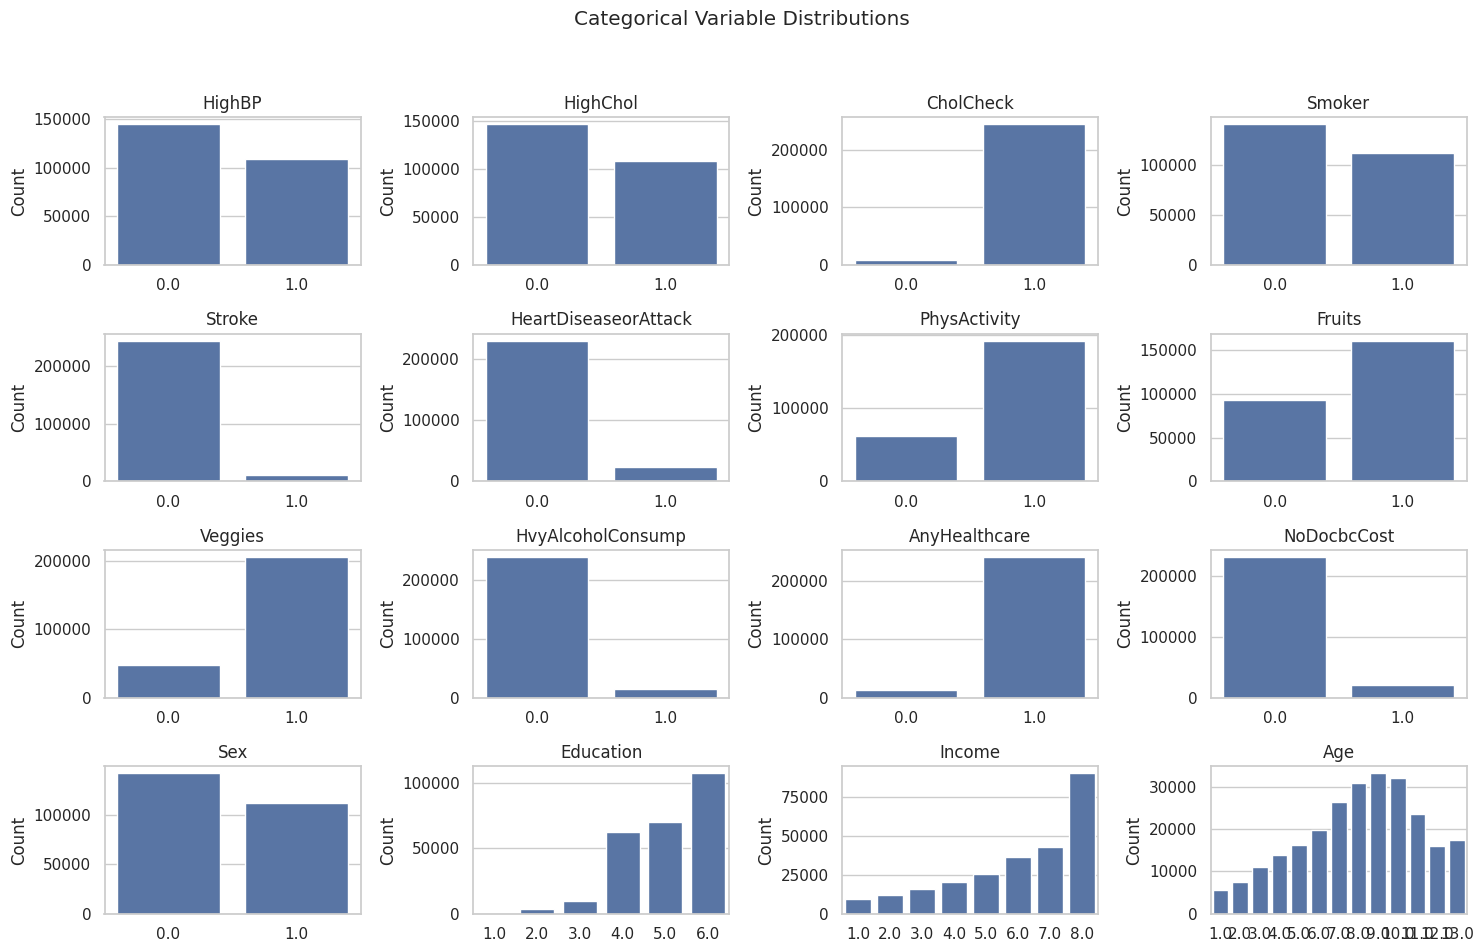

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grid_of_categorical_distributions(dataframe, categorical_columns, number_of_rows, number_of_columns):
    """
    Plots a grid of bar charts for categorical variables in a given dataframe.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - categorical_columns: List of column names in the dataframe that are categorical.
    - number_of_rows: Number of rows in the grid.
    - number_of_columns: Number of columns in the grid.
    """
    fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=(15, 10))
    fig.suptitle('Categorical Variable Distributions')

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate over all the categorical columns and create bar plots
    for i, column in enumerate(categorical_columns):
        # Create a countplot for the current categorical column
        sns.countplot(x=dataframe[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')

    # Remove any unused subplots
    for ax in axes[i+1:]:
        ax.remove()

    # Adjust the layout so that titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust as necessary
    plt.show()

# Example usage:
# Assume 'data' is your DataFrame and you have a list of categorical column names
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', 
                       'Education', 'Income', 'Age']

# Determine the size of the grid
number_of_plots = len(categorical_columns)
number_of_columns = 4
number_of_rows = number_of_plots // number_of_columns + (number_of_plots % number_of_columns > 0)

plot_grid_of_categorical_distributions(data, categorical_columns, number_of_rows, number_of_columns)


## Grid of Categorical Variable Distributions

The series of bar plots presented above illustrates the distribution of categorical variables within our dataset. Each plot provides a visual count of the categories within each variable. Here are some observations and interpretations based on the displayed plots:

### Observations

- **HighBP**: The dataset contains a fairly even split between individuals with and without high blood pressure, though the count of individuals without high blood pressure is slightly higher.
- **HighChol**: Similar to HighBP, there's a relatively balanced distribution between individuals with and without high cholesterol, indicating good diversity in this health indicator.
- **CholCheck**: The vast majority of individuals have been checked for cholesterol, suggesting that cholesterol checks are common among the respondents.
- **Smoker**: The respondents are roughly evenly split between smokers and non-smokers.
- **Stroke**: A small fraction of individuals have experienced a stroke, indicating that this is a rare event within the dataset.
- **HeartDiseaseorAttack**: Like stroke, heart disease or heart attacks are not common among the respondents.
- **PhysActivity**: Most individuals engage in physical activity, which is a positive health behavior.
- **Fruits**: The respondents are split fairly evenly on the consumption of fruits, though slightly more individuals consume fruits regularly.
- **Veggies**: A large portion of individuals consume vegetables, which is another positive health behavior.
- **HvyAlcoholConsump**: Heavy alcohol consumption is rare among the respondents.
- **AnyHealthcare**: Most individuals have access to healthcare.
- **NoDocbcCost**: A minority of individuals have reported not seeing a doctor due to cost, which may be an essential factor for health outcomes.
- **Sex**: The distribution between sexes is relatively balanced in the dataset.
- **Education**: There's a good spread across different education levels, with the majority having at least graduated high school.
- **Income**: The income levels of individuals vary, with fewer individuals in the higher income brackets.

### Interpretations and Further Analysis

- **Health Indicators**: Variables such as `HighBP`, `HighChol`, `Stroke`, and `HeartDiseaseorAttack` are critical as they directly relate to common risk factors for various diseases, including diabetes.
- **Lifestyle Factors**: `Smoker`, `PhysActivity`, `Fruits`, `Veggies`, and `HvyAlcoholConsump` reflect lifestyle choices that can significantly impact health outcomes and will be interesting to correlate with the presence of diabetes.
- **Healthcare Access**: `AnyHealthcare` and `NoDocbcCost` provide insights into healthcare accessibility, which may influence early diagnosis and management of conditions like diabetes.
- **Demographics**: `Sex`, `Education`, and `Income` can provide demographic correlations with health conditions and will be valuable in understanding the socioeconomic factors related to diabetes.

These initial observations set the stage for deeper analysis, including investigating how each of these variables correlates with the target variable (`Diabetes_012`) and with each other. Understanding these relationships will be crucial in building a predictive model that can accurately identify risk factors for diabetes.


## Continuous Variables

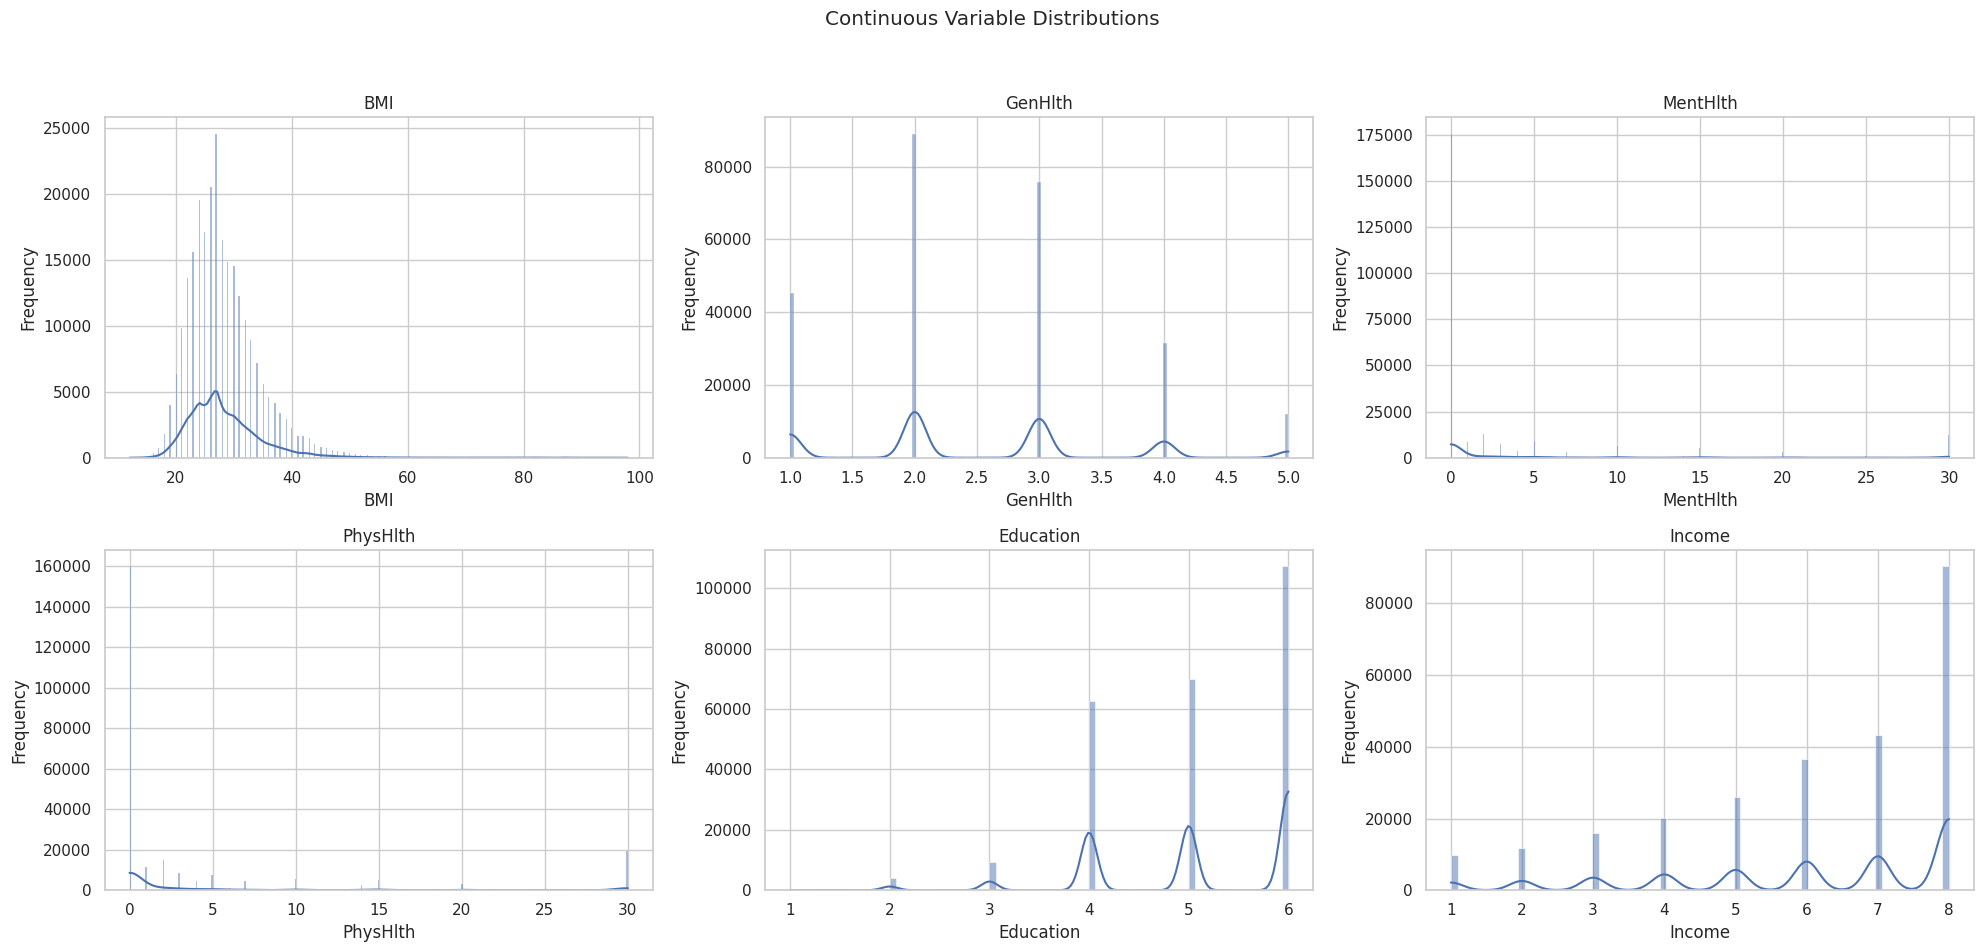

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grid_of_continuous_distributions(dataframe, continuous_columns, number_of_rows, number_of_columns):
    """
    Plots a grid of histograms for continuous variables in a given dataframe.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - continuous_columns: List of column names in the dataframe that are continuous.
    - number_of_rows: Number of rows in the grid.
    - number_of_columns: Number of columns in the grid.
    """
    fig, axes = plt.subplots(nrows=number_of_rows, ncols=number_of_columns, figsize=(20, 10))
    fig.suptitle('Continuous Variable Distributions')

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate over all the continuous columns and create histograms
    for i, column in enumerate(continuous_columns):
        sns.histplot(dataframe[column], kde=True, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    # Remove any unused subplots
    for ax in axes[i+1:]:
        ax.remove()

    # Adjust the layout so that titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust as necessary
    plt.show()

# Example usage:
# Assume 'data' is your DataFrame and you have a list of continuous column names
continuous_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']
# Determine the size of the grid
number_of_plots = len(continuous_columns)
number_of_columns = 3  # You can choose how many columns you want
number_of_rows = number_of_plots // number_of_columns + (number_of_plots % number_of_columns > 0)

plot_grid_of_continuous_distributions(data, continuous_columns, number_of_rows, number_of_columns)


## Grid of Continuous Variable Distributions

The set of histograms above display the distributions of various continuous variables within our dataset. Each histogram shows the frequency of different values for a variable, providing us with insights into the shape of the distribution, central tendencies, variability, and the presence of outliers.

### Observations

- **BMI**: The distribution of Body Mass Index (BMI) appears to be right-skewed, with a peak around the 25-30 range, which is typically considered overweight by clinical standards. The long tail towards the higher BMI values suggests the presence of outliers, which may need further investigation or handling during preprocessing.

- **Age**: The histogram for Age shows a multimodal distribution with several peaks, suggesting distinct age groups within the dataset. This variable seems to be discretized into age ranges rather than individual ages.

- **GenHlth**: General health ratings show a left-skewed distribution, with a majority of individuals rating their health positively (lower values indicate better general health).

- **Education**: This variable displays a distribution with peaks at certain values, indicating discrete levels of education achieved by the individuals in the dataset. 

- **MentHlth**: Mental health status, indicated by the number of days experiencing poor mental health, is heavily skewed to the right, showing that most individuals report few days with poor mental health.

- **PhysHlth**: Physical health status, similar to mental health, is right-skewed with most individuals reporting few days where physical health was not good.

- **Income**: Income levels are shown to be skewed to the right, with a peak at the higher end of the scale, indicating that a smaller segment of the dataset falls into the higher income brackets.

### Interpretations and Further Analysis

The initial look at these distributions informs us about the need to possibly transform some of these variables to address skewness, which could help improve the performance of certain machine learning algorithms. For example:

- **Skewed Distributions**: Right-skewed distributions like BMI, MentHlth, and PhysHlth might benefit from log transformation or other methods to normalize the data.
- **Discretized Variables**: Variables that show a multimodal or discretized distribution, such as Age and Education, may be best treated as categorical or ordinal variables in predictive modeling.
- **Outliers**: We will need to decide how to handle potential outliers, especially in variables like BMI. Options include outlier removal, capping, or using robust scaling methods.

Before proceeding to predictive modeling, we should consider these preprocessing steps carefully, as they can significantly impact the model's ability to learn from the data. Additionally, we will explore correlations between these continuous variables and the target variable to identify potential predictors for diabetes.

The next steps will involve deeper statistical analysis and potentially applying transformations to these variables to prepare for modeling. We will also consider the relationships between continuous variables and the target to uncover any linear or nonlinear associations.


## Visual Assessment of Normality

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# List of continuous variables
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth']

for var in continuous_vars:
    # Shapiro-Wilk test
    stat, p = stats.shapiro(data[var])
    print(f'Shapiro-Wilk test for {var}:\nStatistics={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print(f'Data for {var} looks normally distributed (fail to reject H0).\n')
    else:
        print(f'Data for {var} does not look normally distributed (reject H0).\n')


Shapiro-Wilk test for BMI:
Statistics=0.8717145323753357, p=0.0
Data for BMI does not look normally distributed (reject H0).

Shapiro-Wilk test for MentHlth:
Statistics=0.4871644377708435, p=0.0
Data for MentHlth does not look normally distributed (reject H0).

Shapiro-Wilk test for PhysHlth:
Statistics=0.5385515689849854, p=0.0
Data for PhysHlth does not look normally distributed (reject H0).



/home/codespace/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


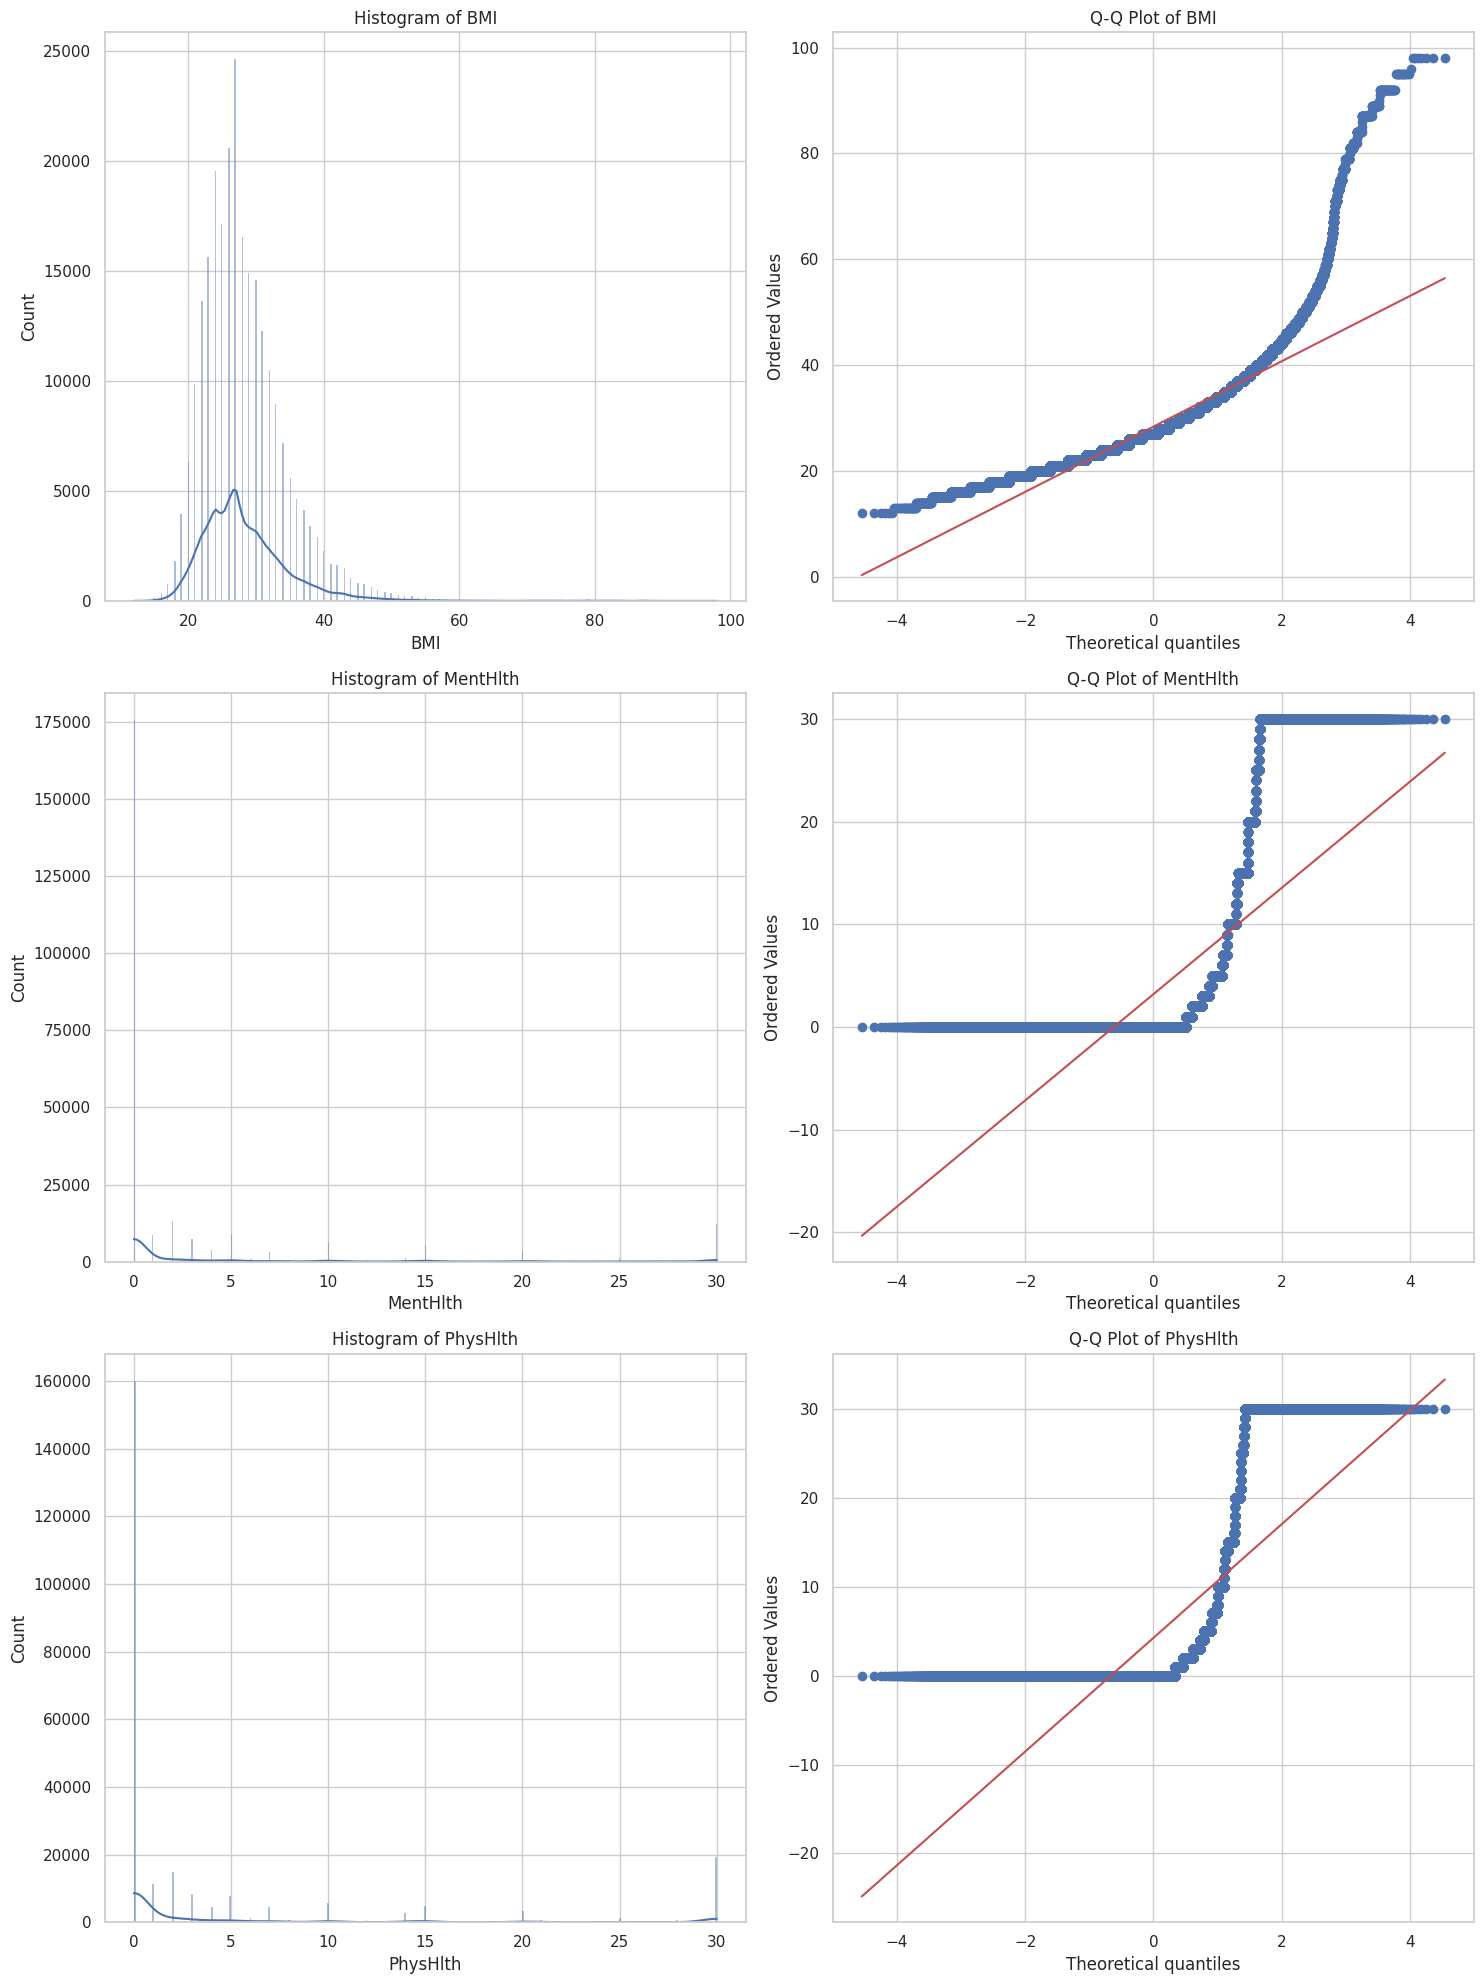

In [9]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Flatten the array of axes, for easy iterating
axs = axs.flatten()

for i, var in enumerate(continuous_vars):
    # Histogram for the variable
    sns.histplot(data[var], kde=True, ax=axs[i*2])
    axs[i*2].set_title(f'Histogram of {var}')

    # Q-Q plot for the variable
    stats.probplot(data[var], dist="norm", plot=axs[i*2 + 1])
    axs[i*2 + 1].set_title(f'Q-Q Plot of {var}')

# Adjust layout
plt.tight_layout()
plt.show()


## Assessing Normality of Continuous Variables

Assessment of normality for the continuous variables 'BMI', 'MentHlth', and 'PhysHlth' using both histograms and Q-Q plots.

### Observations

- 'BMI' shows a right-skewed distribution. The Q-Q plot indicates that the tails of the 'BMI' distribution deviate from normality, with a heavier tail on the right side, which could represent a population with a higher prevalence of overweight and obesity.
- 'MentHlth' is also right-skewed with most values concentrated at the lower end. The Q-Q plot indicates a non-normal distribution, suggesting that the majority of the population reports fewer mental health issues.
- 'PhysHlth' shows a distribution pattern similar to 'MentHlth', with a right-skewed distribution and a corresponding Q-Q plot indicating non-normality.

### Implications for Modeling

Given these observations, I may consider several approaches for modeling:

- For right-skewed variables like 'BMI', 'MentHlth', and 'PhysHlth', I could apply transformations such as logarithmic or square root transformations to reduce skewness and approximate normality.
- The presence of skewness and outliers in variables such as 'BMI' might also necessitate the use of robust scaling techniques or the application of outlier treatment methods before modeling.

In our modeling efforts, I should be cautious about using algorithms that assume normality of the input data. Instead, I may prioritize machine learning models that can handle non-normal distributions and are robust to outliers.

The next steps in our analysis will involve making decisions on how to handle these variables in the preprocessing phase to prepare our data for the chosen modeling techniques.


## Statistical Analysis - Statistical Tests for Difference

## Kruskal-Wallis H Test (for Non-Normally Distributed Data with More Than Two Groups)

In [10]:
from scipy.stats import kruskal
import pandas as pd

def run_kruskal_wallis_test(data, group_col, features):
    """
    Runs the Kruskal-Wallis H test for multiple features.

    Parameters:
    - data: pandas DataFrame containing the data
    - group_col: the column name containing the group labels
    - features: a list of column names (features) to test

    Returns:
    - results: a DataFrame with the test results
    """
    results = pd.DataFrame(columns=['Feature', 'H-statistic', 'p-value'])

    for feature in features:
        # Prepare a list for the samples of each group
        samples = [data[data[group_col] == group][feature].dropna() for group in data[group_col].unique()]
        
        # Perform the Kruskal-Wallis H test
        h_stat, p_val = kruskal(*samples)

        # Append the results
        results = results.append({'Feature': feature, 'H-statistic': h_stat, 'p-value': p_val}, ignore_index=True)
    
    # Correct p-values for multiple testing if necessary
    # results['p-value'] = multipletests(results['p-value'], method='bonferroni')[1]
    
    return results

# Example usage:
features_to_test = ['BMI', 'MentHlth', 'PhysHlth']  # Replace with your actual features
group_col = 'Diabetes_012'  # Replace with your actual group column

test_results = run_kruskal_wallis_test(data, group_col, features_to_test)
print(test_results)


    Feature   H-statistic        p-value
0       BMI  14130.749997   0.000000e+00
1  MentHlth    528.910573  1.407759e-115
2  PhysHlth   6661.878029   0.000000e+00


/tmp/ipykernel_1430/10418773.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'H-statistic': h_stat, 'p-value': p_val}, ignore_index=True)
/tmp/ipykernel_1430/10418773.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'H-statistic': h_stat, 'p-value': p_val}, ignore_index=True)
/tmp/ipykernel_1430/10418773.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'H-statistic': h_stat, 'p-value': p_val}, ignore_index=True)


## Kruskal-Wallis H Test Results

I conducted the Kruskal-Wallis H test to investigate the differences in 'BMI', 'MentHlth', and 'PhysHlth' across the groups within the `Diabetes_012` variable. The results are as follows:

- **BMI**: The test yielded an H-statistic of 14130.75 with a p-value of 0.000000e+00, strongly suggesting that the distribution of BMI varies significantly across different diabetes status groups. This could imply that BMI is an important factor in diabetes and should be considered when modeling for diabetes risk.

- **MentHlth**: With an H-statistic of 528.91 and a p-value of 1.407759e-115, the test indicates significant differences in mental health across the diabetes groups. This result points to a potential relationship between mental health and diabetes, which may warrant further investigation.

- **PhysHlth**: The H-statistic of 6661.88 and a p-value of 0.000000e+00 demonstrate significant differences in physical health across the groups. This supports the notion that physical health is closely associated with diabetes status.

### Conclusion

The Kruskal-Wallis H test has confirmed that there are statistically significant differences in 'BMI', 'MentHlth', and 'PhysHlth' among the groups defined by diabetes status. These findings underscore the importance of these variables in the context of diabetes and suggest that they may have a strong predictive power in a machine learning model aiming to predict diabetes.

Given the significance of these variables, I will consider them for inclusion in our predictive modeling and ensure that their non-normal distribution is appropriately accounted for in the model.


## Categorical Independent Variables with More Than Two Groups and a Binary/Categorical Dependent Variable

## Chi-Squared Test of Independence for multiple categorical independent variables

In [11]:
from scipy.stats import chi2_contingency
import pandas as pd

def run_chi_squared_tests(data, dependent_var, independent_vars):
    """
    Runs Chi-Squared tests of independence for multiple categorical independent variables.

    Parameters:
    - data: pandas DataFrame containing the data
    - dependent_var: the name of the binary/categorical dependent variable
    - independent_vars: a list of names of the categorical independent variables to test

    Returns:
    - results: a DataFrame with the test results for each independent variable
    """
    results = pd.DataFrame(columns=['Independent Variable', 'Chi-Squared Statistic', 'p-value', 'Degrees of Freedom'])

    for independent_var in independent_vars:
        contingency_table = pd.crosstab(data[dependent_var], data[independent_var])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        
        results = results.append({
            'Independent Variable': independent_var,
            'Chi-Squared Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        }, ignore_index=True)

    return results

# Example usage:
dependent_var = 'Diabetes_012'  # Replace with your actual dependent variable name
independent_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', 
                    'Education', 'Income', 'Age']

chi_squared_results = run_chi_squared_tests(data, dependent_var, independent_vars)
print(chi_squared_results)


/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


    Independent Variable  Chi-Squared Statistic        p-value  \
0                 HighBP           18794.644052   0.000000e+00   
1               HighChol           11258.920399   0.000000e+00   
2              CholCheck            1173.749358  1.329124e-255   
3                 Smoker            1010.511751  3.716732e-220   
4                 Stroke            2916.751980   0.000000e+00   
5   HeartDiseaseorAttack            8244.889107   0.000000e+00   
6           PhysActivity            3789.301463   0.000000e+00   
7                 Fruits             454.347059   2.186703e-99   
8                Veggies             893.841905  8.029646e-195   
9      HvyAlcoholConsump             850.324048  2.261930e-185   
10         AnyHealthcare              69.077977   9.997881e-16   
11           NoDocbcCost             396.081822   9.815790e-87   
12                   Sex             250.850575   3.376679e-55   
13             Education            4560.640279   0.000000e+00   
14        

/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/3064448987.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


## Chi-Squared Test of Independence Results

We have conducted Chi-Squared tests to determine the association between several independent variables and the dependent variable `Diabetes_012`, representing diabetes status. The results are highly significant for all tested variables, suggesting substantial associations across the board.

### Key Findings

- **Risk Factors**: Variables such as `HighBP`, `HighChol`, `Stroke`, `HeartDiseaseorAttack` show the strongest associations with diabetes status, reflecting their roles as potential risk factors.
- **Lifestyle and Health Behavior**: Variables `PhysActivity`, `Fruits`, `Veggies`, and `HvyAlcoholConsump` are significantly associated with diabetes status, implying that lifestyle and health behaviors may influence diabetes risk.
- **Healthcare Access**: `AnyHealthcare` and `NoDocbcCost` present significant associations, pointing to the impact of healthcare access on diabetes status.
- **Demographics**: `Sex`, `Education`, `Income`, and `Age` also demonstrate significant associations, suggesting demographic factors are related to the prevalence of diabetes.

### Implications for Modeling

Given these significant associations, I should consider these variables as potential predictors in our modeling efforts to predict diabetes. The strong associations also warrant a deeper dive to understand the nature and strength of these relationships.

### Further Analysis

While the p-values indicate significant results, I must also consider the effect size and practical significance. Future analysis will involve examining the relative risks or odds ratios to quantify the strength of these associations and to better interpret their practical implications.

In my predictive models, these variables will be included as features, and I will employ appropriate modeling techniques that can handle binary and categorical data.

The next steps will involve preparing these variables for modeling, which may include encoding techniques for categorical data and considering interaction effects between significant predictors.


In [12]:
from scipy.stats import kruskal
import pandas as pd

def run_kruskal_wallis_for_ordinal_outcome(data, ordinal_outcome, discrete_vars):
    """
    Runs the Kruskal-Wallis H test to compare distributions of discrete 
    variables across different groups of an ordinal outcome variable.

    Parameters:
    - data: pandas DataFrame containing the data
    - ordinal_outcome: the name of the ordinal outcome variable
    - discrete_vars: a list of names of the discrete variables to test

    Returns:
    - results: a DataFrame with the test results for each discrete variable
    """
    results = pd.DataFrame(columns=['Discrete Variable', 'H-statistic', 'p-value'])

    for discrete_var in discrete_vars:
        # Prepare a list for the samples of each group
        samples = [group[discrete_var].dropna() for name, group in data.groupby(ordinal_outcome)]
        
        # Perform the Kruskal-Wallis H test
        h_stat, p_val = kruskal(*samples)

        # Append the results
        results = results.append({
            'Discrete Variable': discrete_var,
            'H-statistic': h_stat,
            'p-value': p_val
        }, ignore_index=True)

    return results

# Example usage
ordinal_outcome = 'Diabetes_012'
discrete_vars = ['Education', 'GenHlth', 'Income']

kruskal_results = run_kruskal_wallis_for_ordinal_outcome(data, ordinal_outcome, discrete_vars)
print(kruskal_results)


  Discrete Variable   H-statistic  p-value
0         Education   4083.037135      0.0
1           GenHlth  22480.925024      0.0
2            Income   7558.899340      0.0


/tmp/ipykernel_1430/936822536.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/936822536.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1430/936822536.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


## Kruskal-Wallis H Test Results for Ordinal Outcome

I performed the Kruskal-Wallis H tests to assess the differences in the distributions of 'Education', 'GenHlth', and 'Income' across the different categories of the ordinal variable 'Diabetes_012'. The results are highly significant for all three variables.

### Key Findings

- **Education**: The significant difference in education levels across diabetes categories (H-statistic: 4083.04, p-value: 0.0) suggests that educational background may play a role in diabetes prevalence or management. This could be related to factors like health literacy, access to healthcare resources, or lifestyle choices.

- **GenHlth (General Health)**: With an H-statistic of 22480.93 and a p-value of 0.0, the test shows a strong association between general health perception and diabetes status. This finding highlights the importance of overall health status in relation to diabetes, possibly reflecting the impact of comorbidities or overall health awareness.

- **Income**: The significant results for income (H-statistic: 7558.90, p-value: 0.0) indicate that there is a notable difference in income distribution among individuals with different diabetes statuses. This could point to socioeconomic factors playing a role in the risk and management of diabetes.

### Implications for Further Research and Modeling

These findings underscore the need to consider socioeconomic and health-related factors in studies and models related to diabetes. The significant associations suggest that these variables should be included in predictive modeling efforts for diabetes risk assessment.

Further analysis could explore these relationships in more detail, potentially examining the nature and strength of these associations and how they might be used to inform healthcare strategies and interventions for diabetes management and prevention.


## Correlation Analysis

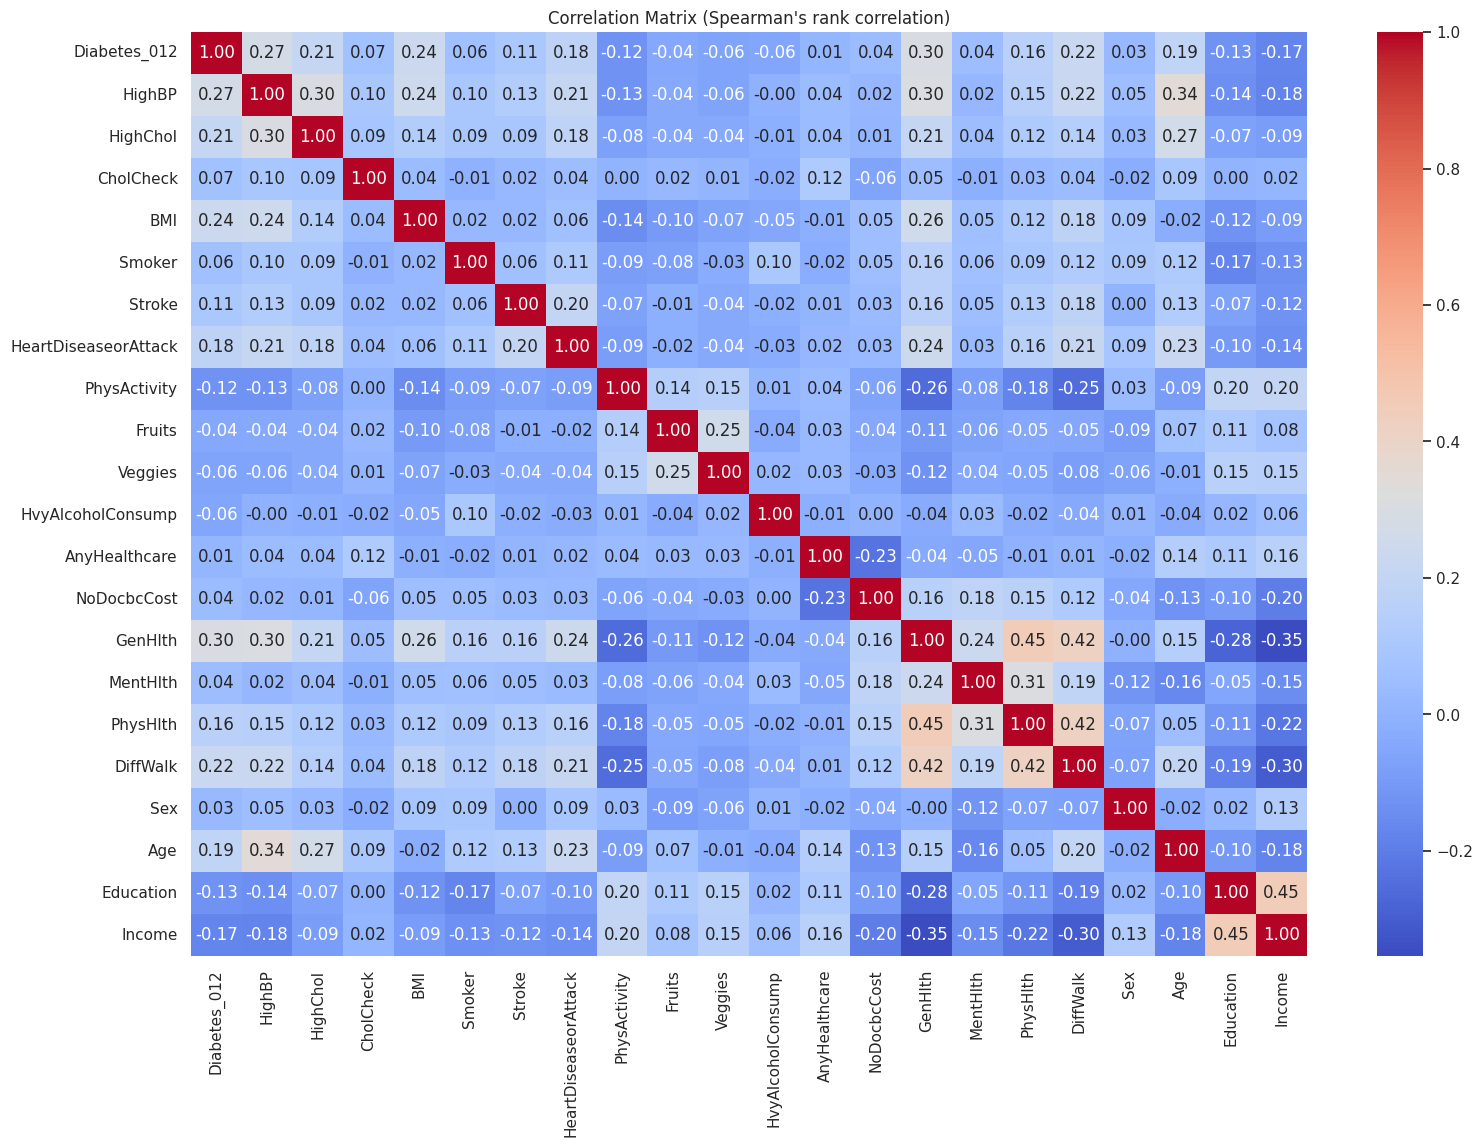

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix (using Spearman's method for ordinal data)
corr_matrix = data.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Spearman's rank correlation)")
plt.show()


## Correlation Matrix Analysis Using Spearman's Rank Correlation

I have conducted a Spearman's rank correlation analysis to identify the strength and direction of the association between different variables in dataset, particularly how they relate to `Diabetes_012`.

### Findings and Interpretations:

- **General Health (GenHlth)**: Exhibits a strong positive correlation with `Diabetes_012` (0.30), which suggests that individuals with poorer general health are more likely to have a higher diabetes category. This relationship is clinically intuitive as general health can deteriorate with the progression of diabetes.

- **Income**: Shows a negative correlation with `Diabetes_012` (-0.17), implying that higher income levels may be inversely related to diabetes status. This may reflect socioeconomic factors that influence health outcomes, including access to better healthcare and healthier lifestyle options.

- **Age**: Has a positive correlation with `Diabetes_012` (0.19), indicating that older age groups tend to have a higher diabetes category. This aligns with the understanding that the risk of diabetes increases with age.

- **Education**: There is a negative correlation with `Diabetes_012` (-0.13), suggesting that higher education levels might be associated with lower diabetes status. This could be related to increased health literacy and health-promoting behaviors among those with higher education.

### Other Notable Correlations:

- **Physical Health (PhysHlth)** and **Mental Health (MentHlth)**: Both are positively correlated with `Diabetes_012`, which may indicate that diabetes has a substantial impact on overall well-being.

- **Healthcare Access (AnyHealthcare, NoDocbcCost)**: These variables have weak correlations with `Diabetes_012`, which may warrant further investigation into healthcare access and its role in diabetes management.

### Implications for Predictive Modeling:

The correlation analysis provides a basis for selecting features for our predictive models. Variables with stronger correlations may serve as important predictors for diabetes status. However, it is essential to consider that correlation does not imply causation, and the relationships observed here will need to be assessed within the context of a predictive model.

In the next steps, I will use these insights to inform our feature engineering and model selection process. I will prioritize variables with stronger correlations for inclusion in the model and consider creating interaction terms where appropriate to capture the combined effects of related variables.

### Cautionary Note:

While Spearman's correlation is robust to non-normal distributions, it only captures monotonic relationships. Some variables may have complex, non-monotonic relationships with `Diabetes_012` that Spearman's correlation cannot detect. Therefore, I will explore additional nonlinear modeling techniques that can capture such relationships.


## Feature-Target Relationship

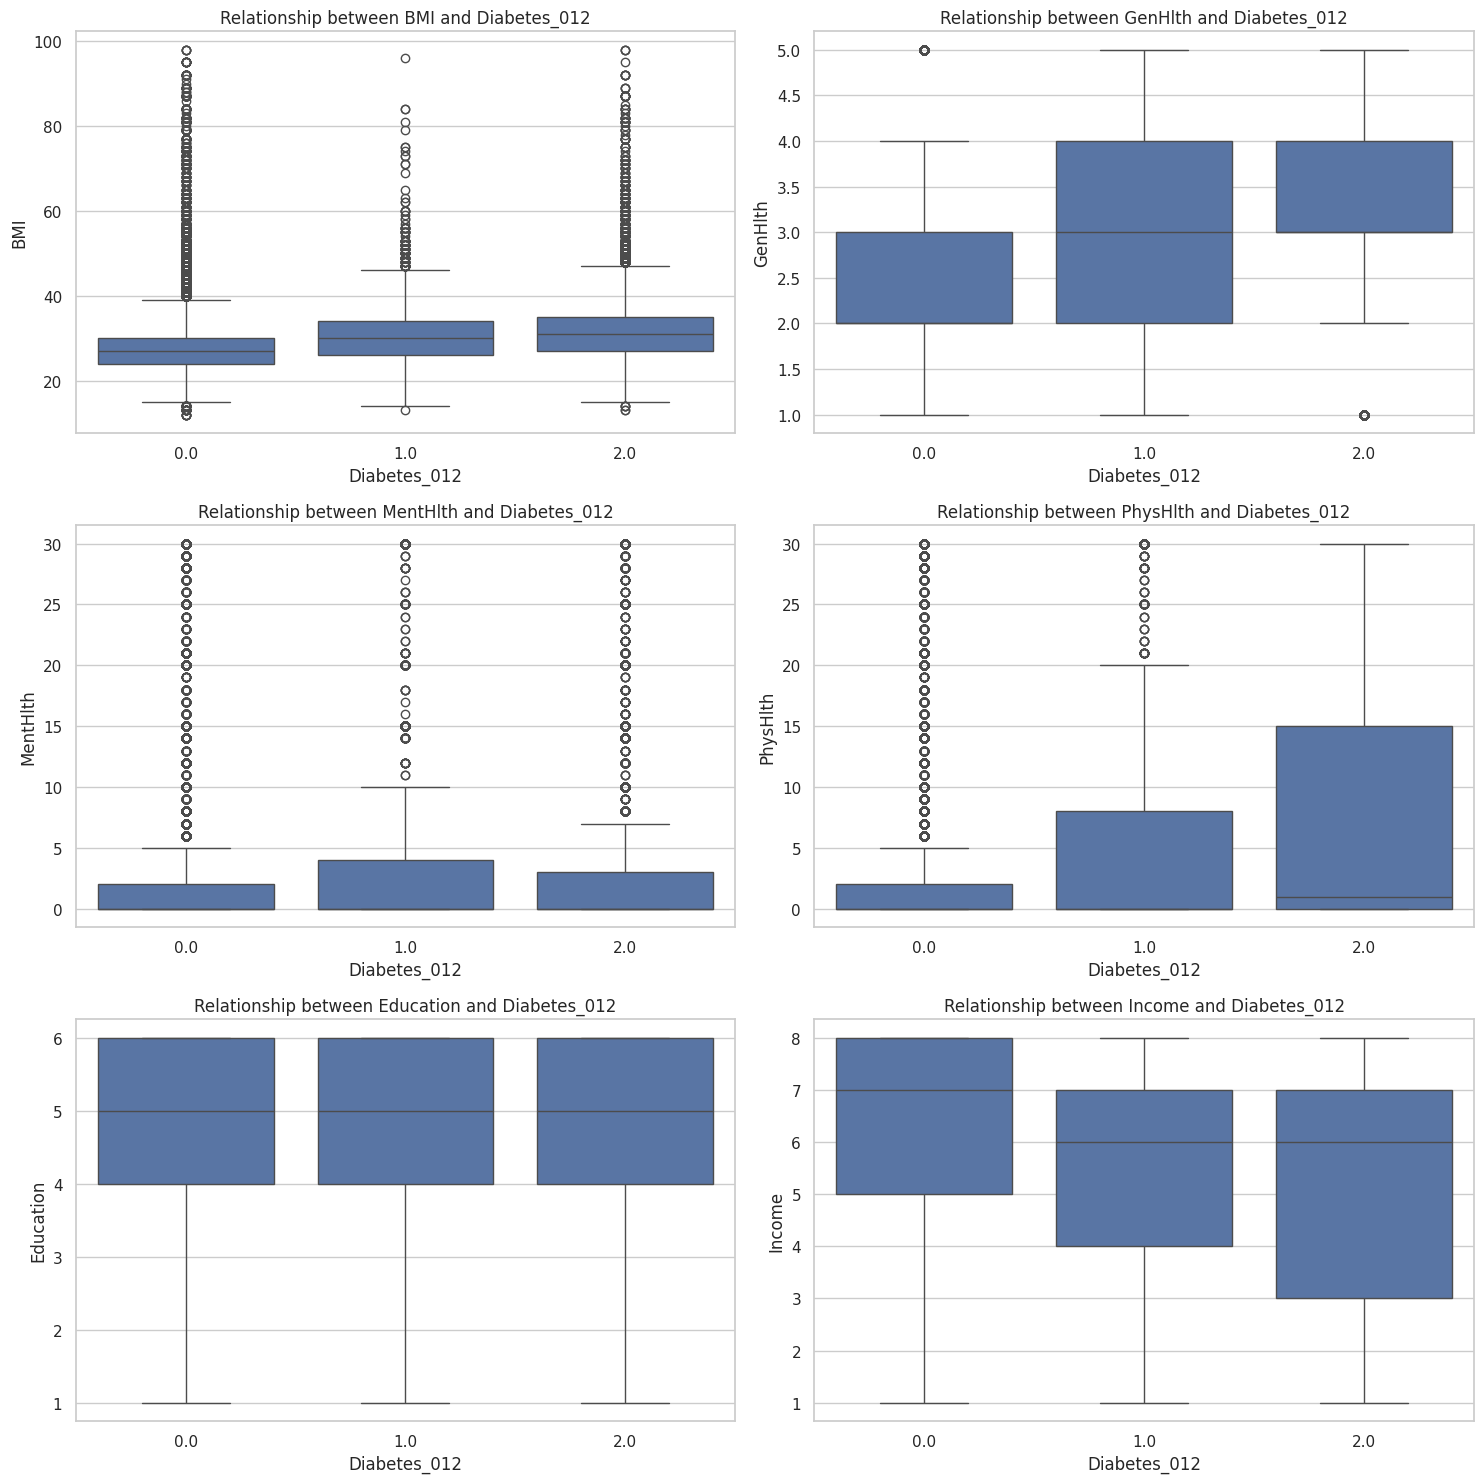

In [17]:
def plot_feature_target_relationship(data, continuous_vars, target_var):
    """
    Plots a grid of boxplots for the relationship between continuous variables and a target variable.
    
    Parameters:
    - data: pandas DataFrame containing the data
    - continuous_vars: a list of names of the continuous variables to plot
    - target_var: the name of the target variable
    """
    num_vars = len(continuous_vars)
    num_cols = 2  # Choose an even number for a visually appealing layout
    num_rows = num_vars // num_cols + (num_vars % num_cols > 0)
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.flatten()  # To make the array 1D for easy iteration

    for i, var in enumerate(continuous_vars):
        sns.boxplot(x=target_var, y=var, data=data, ax=axs[i])
        axs[i].set_title(f'Relationship between {var} and {target_var}')
    
    # If the number of plots is not a perfect multiple of `num_cols`, hide the extra subplots
    for ax in axs[i+1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Usage:
continuous_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']
target_var = 'Diabetes_012'
plot_feature_target_relationship(data, continuous_columns, target_var)


## Feature-Target Relationship Analysis

I have visualized the relationship between several continuous variables and the ordinal target variable 'Diabetes_012' using boxplots. The boxplots provide insights into how the central tendencies and variabilities of these features differ across diabetes status categories.

### Insights Derived:

- **BMI**: Shows an increasing trend with higher diabetes categories, suggesting a correlation between body weight and diabetes. Notably, the data exhibits a significant number of outliers, indicating individual differences.

- **General Health (GenHlth)**: Indicates a strong and clear relationship with diabetes status, with worse general health associated with higher levels of diabetes.

- **Mental Health (MentHlth)**: Does not demonstrate a clear or strong relationship with diabetes categories, though there is some indication of increased variability in the '2.0' category.

- **Physical Health (PhysHlth)**: Reveals a potential relationship where poorer physical health days are more common as diabetes status worsens.

- **Education**: Does not show a distinct variation across diabetes categories, suggesting that education level may not be a strong differentiator in diabetes status in this dataset.

- **Income**: Presents a slight trend where higher income might be inversely related to the likelihood or severity of diabetes, particularly evident in the lower median and interquartile range for the '2.0' category of diabetes.

### Conclusion:

The analysis indicates that health-related features such as BMI, general health, and physical health days show a more noticeable relationship with diabetes status compared to socioeconomic factors such as education and income. However, there is evidence of the potential influence of socioeconomic factors as well.

These findings will guide the feature selection process for our predictive modeling. I will consider including variables that show stronger relationships and variability with diabetes status as potential predictors.

### Next Steps:

Following this analysis, I will proceed to data preprocessing, where I will handle any outliers or skewness identified in the data. This will ensure that our predictive models are robust and capable of capturing the true underlying patterns in the data.


## Baseline Model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and 'Diabetes_012' is the target variable
# Identify categorical columns that need to be one-hot encoded. For example:
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', 
                       'Education', 'Income', 'Age']

# Perform one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Now 'data_encoded' has the original data with categorical variables replaced by their one-hot encoded counterparts

# Define your features and target
X = data_encoded.drop('Diabetes_012', axis=1)  # Features with one-hot encoded columns
y = data_encoded['Diabetes_012']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if the model doesn't converge

# Train the model
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64180
         1.0       0.00      0.00      0.00      1425
         2.0       0.54      0.18      0.27     10499

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.80      0.85      0.81     76104

[[62677     0  1503]
 [ 1302     0   123]
 [ 8580     0  1919]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Baseline Model Evaluation

I have developed a baseline logistic regression model to predict the ordinal variable 'Diabetes_012'. The model's performance on the test set is summarized by the following metrics:

### Model Performance Metrics:

- **Accuracy**: The model achieved an overall accuracy of 85%, indicating a high rate of correct predictions across all classes.
- **Class 0.0 (No Diabetes)**: Exhibited high precision (86%) and recall (98%), resulting in a high F1-score of 0.92, suggesting the model is effective at identifying this class.
- **Class 1.0 (Pre-Diabetes)**: The model failed to correctly predict any instances of this class, as reflected by the precision, recall, and F1-score of 0.00. This indicates that improvements are needed in identifying this group.
- **Class 2.0 (Diabetes)**: Had moderate precision (54%) but low recall (18%), with an F1-score of 0.27, showing some capability to identify this class but with considerable room for improvement.

### Confusion Matrix Analysis:

- The confusion matrix reveals a significant imbalance in the model's predictive capabilities, with a strong bias towards class 0.0, which is the majority class.
- Classes 1.0 and 2.0 were largely misclassified as class 0.0, highlighting a need for strategies to handle class imbalance and improve model sensitivity for the minority classes.

### Conclusion:

While the baseline model performs well in identifying the majority class, it struggles with the minority classes, particularly class 1.0. The following steps will be taken to enhance the model's performance:
- Implement class balancing techniques to address the imbalance in the dataset.
- Explore feature engineering and selection to improve the model's ability to distinguish between classes.
- Evaluate more complex models and algorithms capable of handling ordinal outcomes and class imbalance.
- Adjust the model evaluation framework to focus on metrics that better capture performance across all classes, such as the macro-averaged F1-score.

These steps aim to improve the model's robustness and its ability to accurately predict all categories of the 'Diabetes_012' variable.
